In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

# Beta VAE

[Understanding VAEs](https://towardsdatascience.com/understanding-variational-autoencoders-vaes-f70510919f73)

[What is VAE intuitively](https://towardsdatascience.com/intuitively-understanding-variational-autoencoders-1bfe67eb5daf)

**MNIST data**

In [4]:
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
print(x_train.shape, x_test.shape)
mnist_digits = np.concatenate([x_train, x_test], axis=0)
print(mnist_digits.shape)
mnist_digits = np.expand_dims(mnist_digits, -1).astype("float32") / 255
print(mnist_digits.shape)

(60000, 28, 28) (10000, 28, 28)
(70000, 28, 28)
(70000, 28, 28, 1)


**Keras example code of VAE to beta-VAE**

In [5]:
from model import *

height, width, depth = 28, 28, 1
batch_size = 32
filters = [32,64]
latent_dim = 10
image_size = (height, width, depth)
last_convdims = (int(height/(2**(len(filters)))),
                 int(width/(2**(len(filters)))))

In [6]:
encoder = Encoder(filters=filters,latent_dim=latent_dim)
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv_layer_1 (Conv2D)           (None, 14, 14, 32)   320         encoder_input[0][0]              
__________________________________________________________________________________________________
conv_norm_1 (BatchNormalization (None, 14, 14, 32)   128         conv_layer_1[0][0]               
__________________________________________________________________________________________________
conv_relu_1 (ReLU)              (None, 14, 14, 32)   0           conv_norm_1[0][0]                
____________________________________________________________________________________________

In [7]:
decoder = Decoder(latent_dim=latent_dim, filters=filters, last_convdims=last_convdims, img_depth=depth)
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
latent_input (InputLayer)    [(None, 10)]              0         
_________________________________________________________________
dense_1 (Dense)              (None, 3136)              34496     
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 64)          0         
_________________________________________________________________
deconv2d_1 (Conv2DTranspose) (None, 14, 14, 64)        36928     
_________________________________________________________________
deconv_norm_1 (BatchNormaliz (None, 14, 14, 64)        256       
_________________________________________________________________
deconv_relu_1 (ReLU)         (None, 14, 14, 64)        0         
_________________________________________________________________
deconv2d_2 (Conv2DTranspose) (None, 28, 28, 64)        3692

In [8]:
bvae = VAE(encoder, decoder, beta = 10.)
bvae.compile(optimizer=keras.optimizers.Adam())
bvae.fit(mnist_digits, epochs=15, batch_size=batch_size)

Epoch 1/15
2188/2188 [==============================] - 458s 208ms/step - Total_loss: 208.1321 - Reconstruction_loss: 205.0150 - KL_loss: 0.3117
Epoch 2/15
2188/2188 [==============================] - 436s 199ms/step - Total_loss: 201.5030 - Reconstruction_loss: 195.2064 - KL_loss: 0.6297
Epoch 3/15
2188/2188 [==============================] - 424s 194ms/step - Total_loss: 198.8072 - Reconstruction_loss: 190.2540 - KL_loss: 0.8553
Epoch 4/15
2188/2188 [==============================] - 431s 197ms/step - Total_loss: 197.9323 - Reconstruction_loss: 188.2572 - KL_loss: 0.9675
Epoch 5/15
2188/2188 [==============================] - 409s 187ms/step - Total_loss: 197.5667 - Reconstruction_loss: 187.3447 - KL_loss: 1.0222
Epoch 6/15
2188/2188 [==============================] - 420s 192ms/step - Total_loss: 197.3507 - Reconstruction_loss: 186.7449 - KL_loss: 1.0606
Epoch 7/15
2188/2188 [==============================] - 420s 192ms/step - Total_loss: 197.1250 - Reconstruction_loss: 186.1826 - K

In [17]:
def show_reconstr_hor(image,vae_model):
    img = np.expand_dims(image, 0)
    z_mean,_,_ = vae_model.encoder.predict(img)
    prediction = vae_model.decoder.predict(z_mean)
    plt.rcParams['font.size'] = 10
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
    bef_n_aft = [image,prediction[0,:,:,:]]
    titles = ['Initial image','Encoded-Decoded image']
    for i,ax in enumerate(axs.flat):
        ax.imshow(bef_n_aft[i],cmap='binary_r')
        ax.set_title(titles[i])
        ax.axis('off')
    plt.tight_layout()
    plt.show()

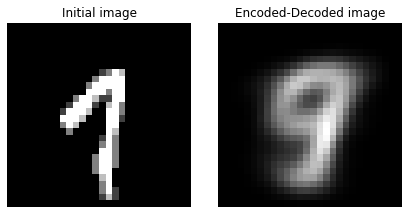

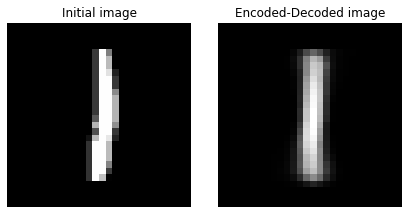

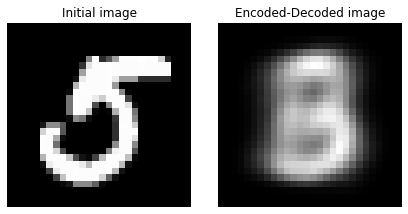

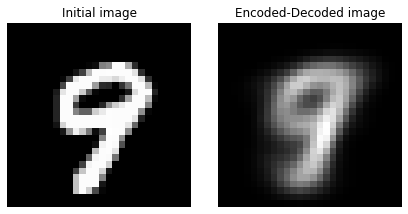

In [19]:
import numpy as np

random_images = np.random.choice(range(70000),size=4)
for i in random_images:
    show_reconstr_hor(mnist_digits[i,:,:,:],bvae)

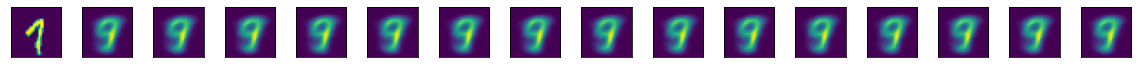

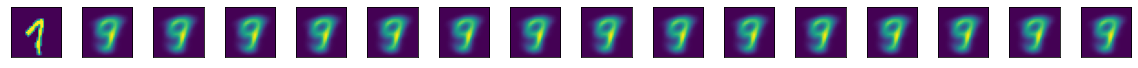

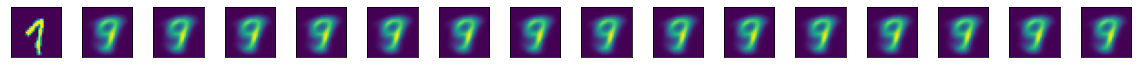

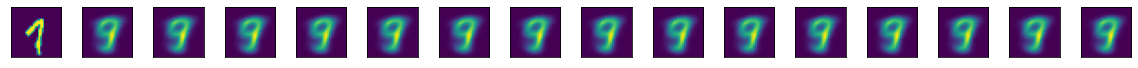

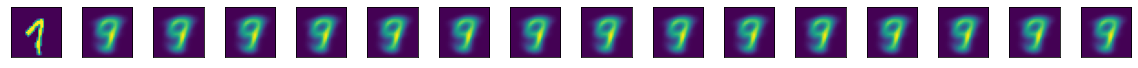

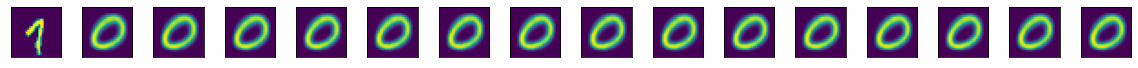

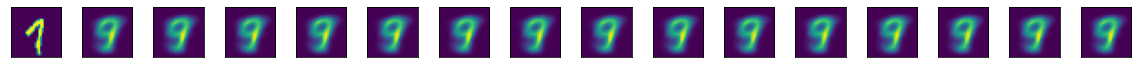

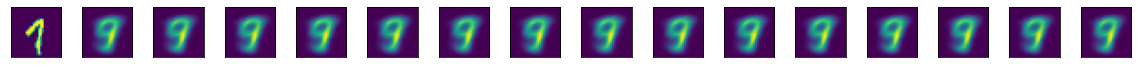

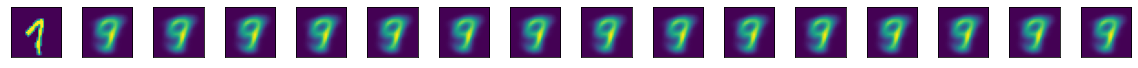

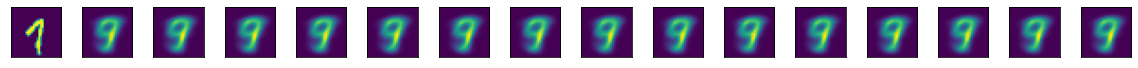

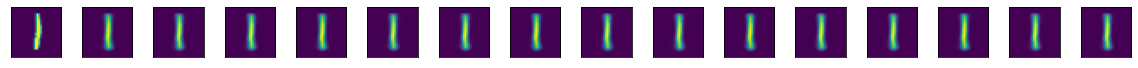

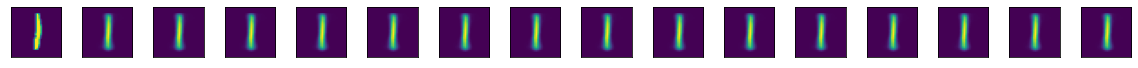

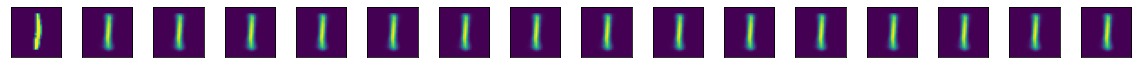

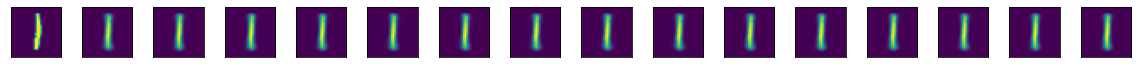

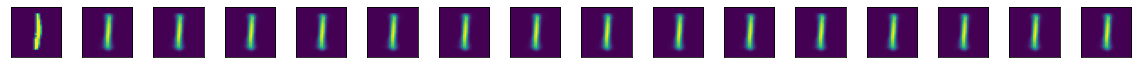

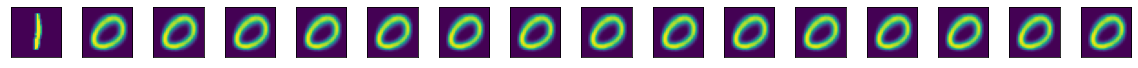

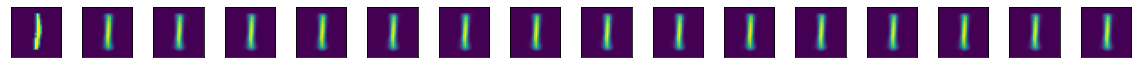

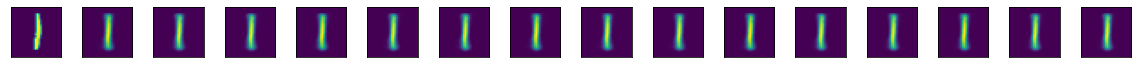

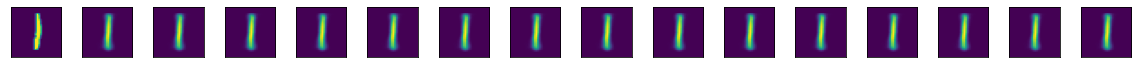

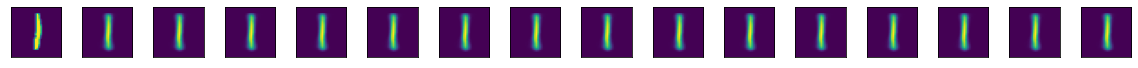

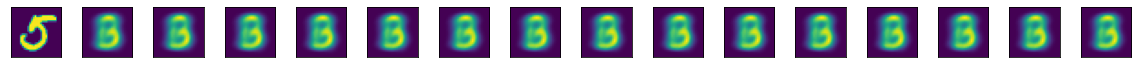

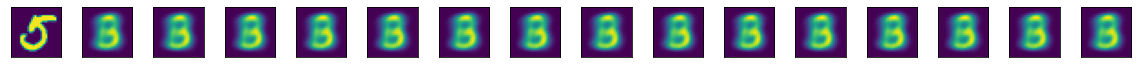

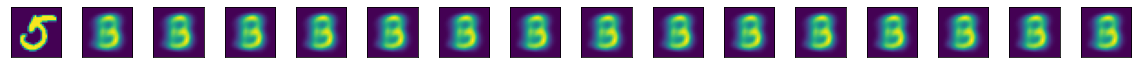

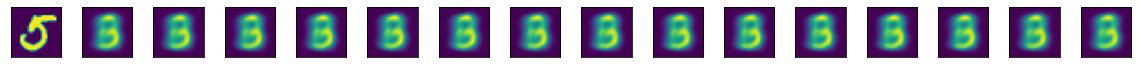

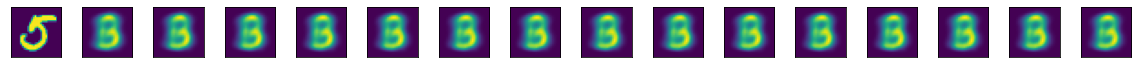

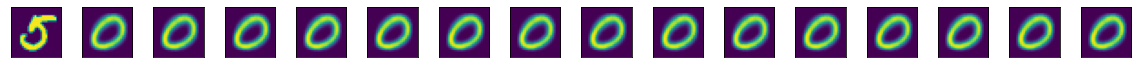

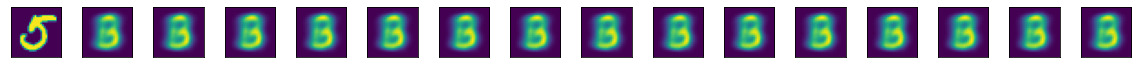

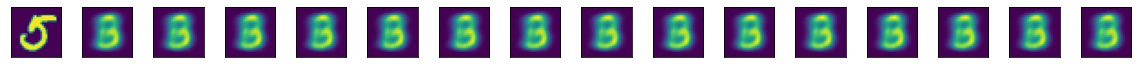

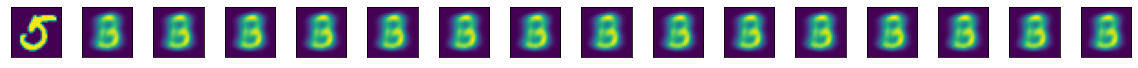

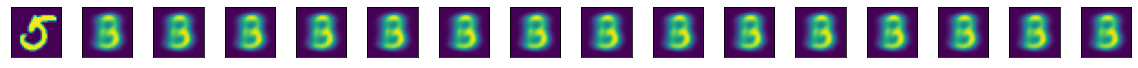

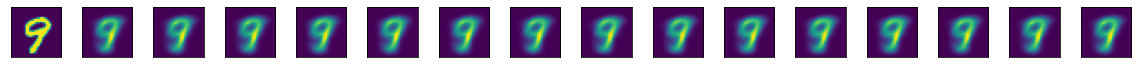

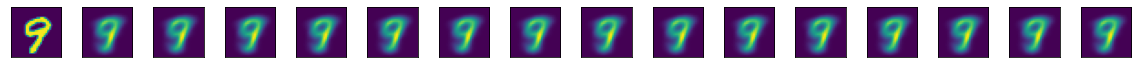

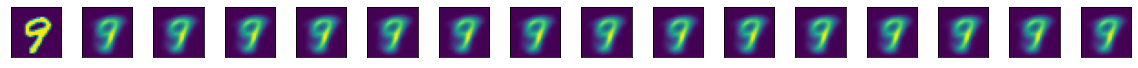

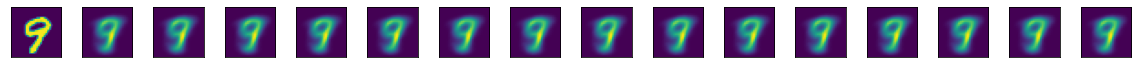

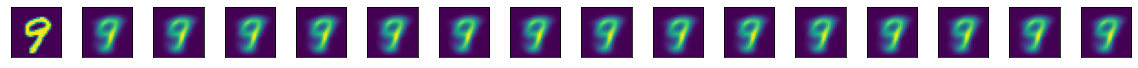

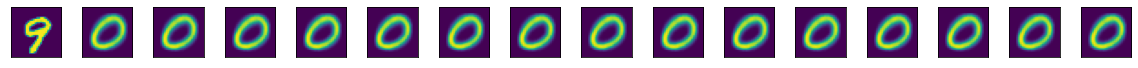

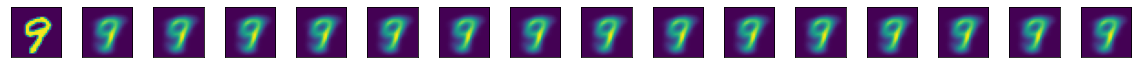

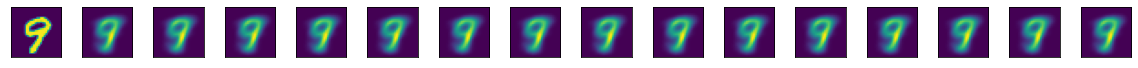

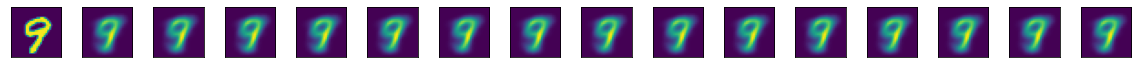

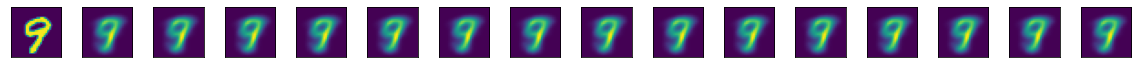

In [22]:
for i in random_images:
    for j in range(10):
        generate_images(vae_model=bvae, 
                        image=np.expand_dims(mnist_digits[i,:,:,:],axis=0), 
                        latent_dim=10, lat_feature=j)